## データの読み込み

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from PIL import Image
import glob

In [2]:
!pip install japanize_matplotlib

  Using cached japanize_matplotlib-1.1.3-py3-none-any.whl


In [32]:
#ファイルの形式はjpegなので、ファイル名には必ず拡張子.jpgがつく
#高本彩花の画像はフォルダ名'ak', 松本潤の画像はフォルダ名''mj
ak_path='ayaka_takamoto/*.jpg'
mj_path='jun_matsumoto/*.jpg'

#test dataの読み込み
test_path = 'test_img/*.jpg'

In [33]:
"""
画像を配列に変換したデータとして、画像ごとにラベルを割り当てる

引数はファイルのパス
戻り値はnp.array型に変換された画像データ
"""

def make_dataset(img_paths):
    dataset=[]
    
    for img_path in img_paths:
        img=Image.open(img_path)
        img_array=np.asarray(img)
        size=img_array.shape[0]*img_array.shape[1]*img_array.shape[2]
        img_data=img_array.reshape(1,size)
        
        dataset.append(img_data[0])
    dataset=np.array(dataset)
    
    return dataset

ak_df=make_dataset(img_paths=glob.glob(ak_path))
mj_df=make_dataset(img_paths=glob.glob(mj_path))
test_df=make_dataset(img_paths=glob.glob(test_path))

#データフレーム型に変換して結合
ak_df=pd.DataFrame(ak_df)
mj_df=pd.DataFrame(mj_df)
ak_df['cluster']=0
mj_df['cluster']=1
df=pd.concat([ak_df, mj_df], axis=0)

test_df=pd.DataFrame(test_df)

In [34]:
#目的変数と説明変数に分割
from sklearn.model_selection import train_test_split

X=df.drop(['cluster'],axis=1)
y=df['cluster']

test=test_df/255.0

#訓練データと検証データに分割
train_X, val_X, train_y, val_y=train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
train_X, val_X=train_X/255.0, val_X/255.0

In [36]:
train_X

0         1         2         3         4         5         6       \
221  0.505882  0.505882  0.513725  0.501961  0.501961  0.509804  0.498039   
212  0.164706  0.149020  0.101961  0.164706  0.149020  0.101961  0.176471   
191  0.854902  0.815686  0.807843  0.854902  0.815686  0.807843  0.854902   
12   0.576471  0.698039  0.780392  0.576471  0.698039  0.780392  0.572549   
206  0.200000  0.196078  0.180392  0.188235  0.184314  0.168627  0.176471   
..        ...       ...       ...       ...       ...       ...       ...   
96   0.196078  0.250980  0.301961  0.207843  0.262745  0.313725  0.219608   
192  0.827451  0.788235  0.792157  0.823529  0.784314  0.788235  0.803922   
117  0.988235  0.988235  0.988235  0.988235  0.988235  0.988235  0.988235   
47   0.407843  0.407843  0.400000  0.466667  0.466667  0.458824  0.545098   
172  0.937255  0.933333  0.925490  0.949020  0.945098  0.937255  0.956863   

       7         8         9       ...    269990    269991    269992  \
221  0.498039  0.505882  0.494118  ...  0.705882  0.760784  0.725490   
212  0.152941  0.098039  0.180392  ...  0.549020  0.607843  0.600000   
191  0.815686  0.807843  0.858824  ...  0.858824  0.945098  0.933333   
12   0.698039  0.780392  0.572549  ...  0.905882  0.749020  0.866667   
206  0.172549  0.156863  0.168627  ...  0.705882  0.827451  0.427451   
..        ...       ...       ...  ...       ...       ...       ...   
96   0.274510  0.325490  0.223529  ...  0.039216  0.019608  0.023529   
192  0.764706  0.768627  0.784314  ...  0.619608  0.717647  0.662745   
117  0.988235  0.988235  0.988235  ...  0.254902  0.262745  0.278431   
47   0.545098  0.537255  0.619608  ...  0.949020  0.945098  0.945098   
172  0.952941  0.945098  0.956863  ...  0.968627  0.972549  0.964706   

       269993    269994    269995    269996    269997    269998    269999  
221  0.705882  0.760784  0.725490  0.705882  0.760784  0.725490  0.705882  
212  0.549020  0.607843  0.600000  0.549020  0.607843  0.600000  0.549020  
191  0.858824  0.945098  0.933333  0.858824  0.945098  0.933333  0.858824  
12   0.905882  0.749020  0.866667  0.905882  0.749020  0.866667  0.905882  
206  0.725490  0.823529  0.423529  0.749020  0.827451  0.427451  0.764706  
..        ...       ...       ...       ...       ...       ...       ...  
96   0.039216  0.019608  0.023529  0.039216  0.019608  0.023529  0.039216  
192  0.619608  0.717647  0.662745  0.619608  0.717647  0.662745  0.619608  
117  0.274510  0.258824  0.282353  0.282353  0.243137  0.266667  0.266667  
47   0.945098  0.941176  0.941176  0.941176  0.937255  0.937255  0.937255  
172  0.968627  0.972549  0.964706  0.968627  0.972549  0.964706  0.968627  

[315 rows x 270000 columns]

In [37]:
train_X=np.asarray(train_X).reshape((len(train_X), 300, 300, 3))
val_X=np.asarray(val_X).reshape((len(val_X), 300, 300, 3))
test_X=np.asarray(test).reshape((len(test), 300, 300, 3))

## CNN Implementation for TensorFlow

In [48]:
from tensorflow.keras import Sequential, layers, models, callbacks

In [49]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3)))
model.add(layers.MaxPooling2D((2, 2)))
#ドロップアウト
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#ドロップアウト
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
          
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 149, 149, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 73, 73, 64)       

In [50]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 149, 149, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 73, 73, 64)       

In [52]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

es_cb=callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history=model.fit(
    train_X, 
    train_y, 
    batch_size=10,
    validation_split=0.2,
    callbacks=es_cb,
    epochs=10
)

Epoch 1/10
26/26 [==============================] - 32s 1s/step - loss: 1.8065 - accuracy: 0.5437 - val_loss: 0.7622 - val_accuracy: 0.4762
Epoch 2/10
26/26 [==============================] - 31s 1s/step - loss: 0.5912 - accuracy: 0.7698 - val_loss: 0.3325 - val_accuracy: 0.9048
Epoch 3/10
26/26 [==============================] - 30s 1s/step - loss: 0.4638 - accuracy: 0.8254 - val_loss: 0.2958 - val_accuracy: 0.8730
Epoch 4/10
26/26 [==============================] - 36s 1s/step - loss: 0.2806 - accuracy: 0.8849 - val_loss: 0.3144 - val_accuracy: 0.8571
Epoch 5/10
26/26 [==============================] - 32s 1s/step - loss: 0.2699 - accuracy: 0.8810 - val_loss: 0.4637 - val_accuracy: 0.8254
Epoch 6/10
26/26 [==============================] - 35s 1s/step - loss: 0.1576 - accuracy: 0.9286 - val_loss: 0.2689 - val_accuracy: 0.8730
Epoch 7/10
26/26 [==============================] - 38s 1s/step - loss: 0.0638 - accuracy: 0.9841 - val_loss: 0.3020 - val_accuracy: 0.8730
Epoch 8/10
26/26 [==

In [53]:
test_loss, test_acc = model.evaluate(val_X, val_y)

5/5 [==============================] - 4s 693ms/step - loss: 0.8591 - accuracy: 0.7852


In [54]:
print(test_acc)

0.7851851582527161


In [55]:
model.predict(test_X)

1/1 [==============================] - 0s 297ms/step


array([[0.9896826 , 0.0103174 ],
       [0.995047  , 0.004953  ],
       [0.99352926, 0.00647069],
       [0.99794453, 0.00205545]], dtype=float32)

In [56]:
###結果の表示

def show_result(img_path, predict):
    for index,img_path in enumerate(img_paths):
        plt.figure(figsize=(8,5))

        if predict[index][0]>predict[index][1]:
            result='高本彩花'
        else:
            result='松本潤'

        img = Image.open(img_path)
        img_list = np.asarray(img)
        plt.imshow(img_list)
        plt.title('prediction→'+result)
        plt.show()


1/1 [==============================] - 0s 127ms/step


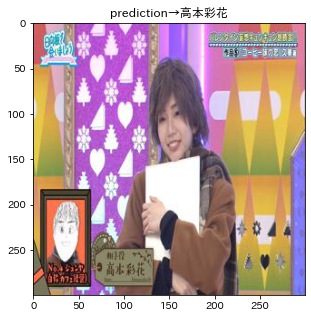

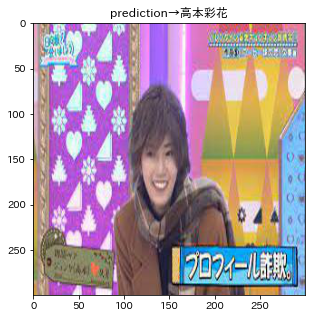

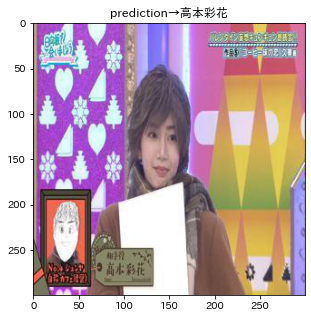

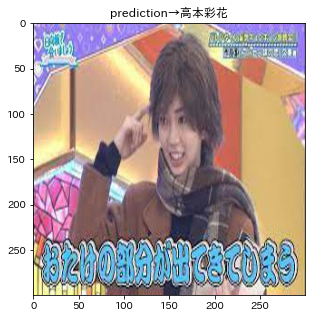

In [57]:
img_paths=glob.glob(test_path)
predict1 = model.predict(test_X)

show_result(img_path=img_paths, predict=predict1)

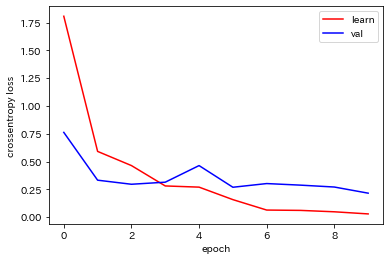

In [58]:
#学習曲線
vars(history)

#学習データでの損失
history.history['loss']

plt.plot(history.history['loss'], label='learn', c='red')
plt.plot(history.history['val_loss'], label='val', c='blue')
plt.xlabel('epoch')
plt.ylabel('crossentropy loss')
plt.legend()
plt.show()

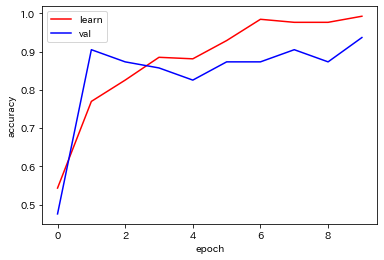

In [59]:
plt.plot(history.history['accuracy'], label='learn', c='red')
plt.plot(history.history['val_accuracy'], label='val', c='blue')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
#モデルの評価
pred_train=model.predict(train_X).argmax(axis=1)
confusion_matrix(train_y,pred_train)

10/10 [==============================] - 10s 866ms/step


array([[155,   2],
       [  5, 153]])

In [63]:
pred_test=model.predict(val_X).argmax(axis=1)
confusion_matrix(val_y,pred_test)

5/5 [==============================] - 4s 706ms/step


array([[56, 14],
       [15, 50]])

In [65]:
pred_test

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1])

In [64]:
val_y

124    0
54     0
41     1
66     1
3      1
      ..
160    1
99     1
195    1
202    1
103    1
Name: cluster, Length: 135, dtype: int64

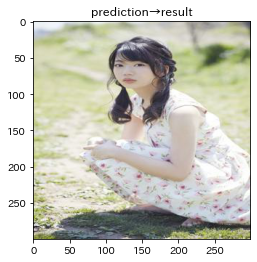

In [95]:
img=val_X[1]
img_list = np.asarray(img)
plt.imshow(img_list)
plt.title('prediction→'+'result')
plt.show()

5/5 [==============================] - 5s 782ms/step
prediction:  0
label:  0


<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

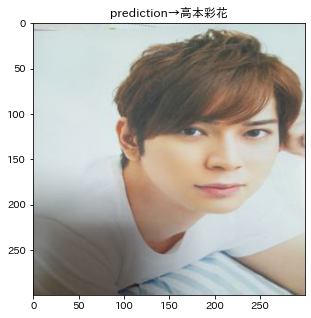

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

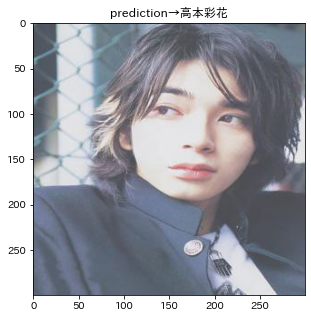

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

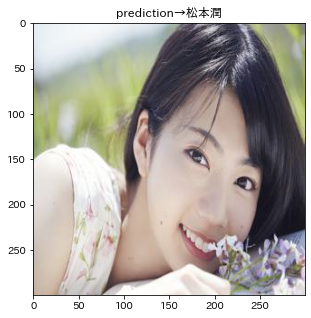

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

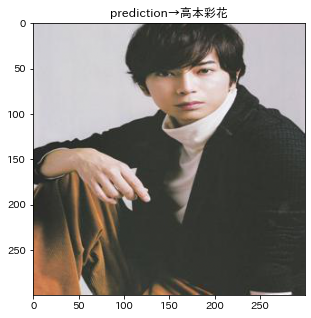

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

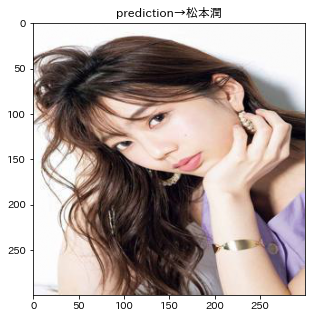

<Figure size 432x288 with 0 Axes>

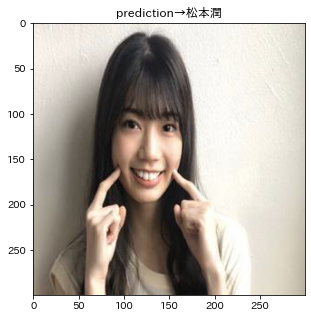

<Figure size 432x288 with 0 Axes>

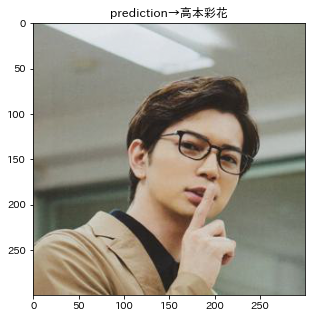

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

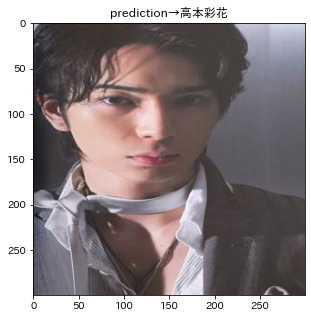

<Figure size 432x288 with 0 Axes>

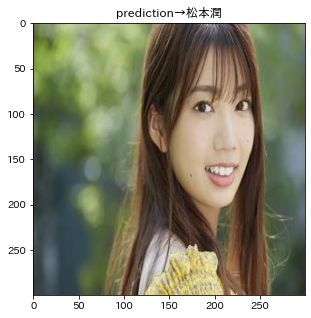

<Figure size 432x288 with 0 Axes>

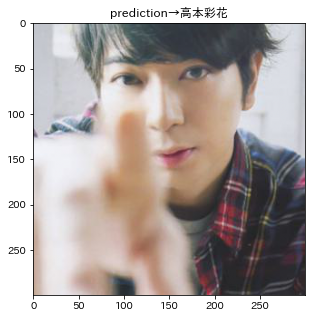

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

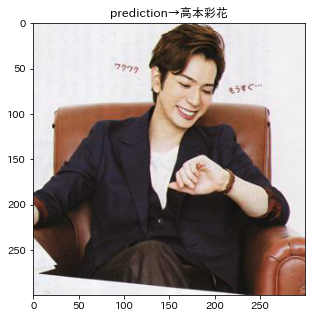

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

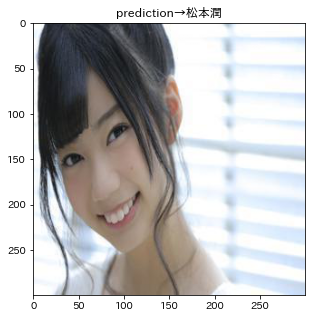

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

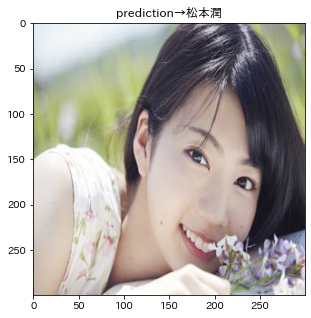

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

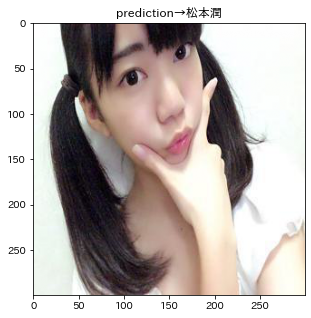

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

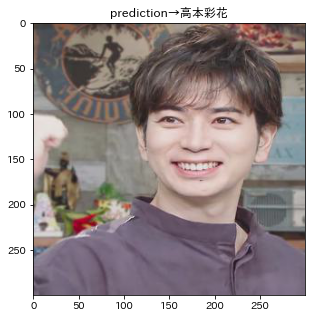

<Figure size 432x288 with 0 Axes>

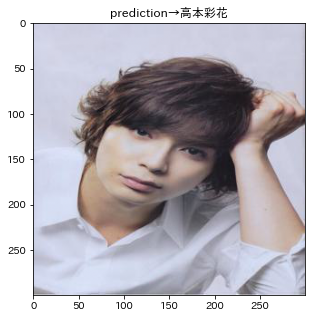

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

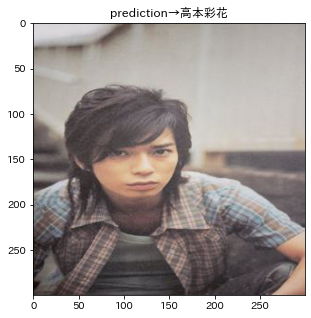

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

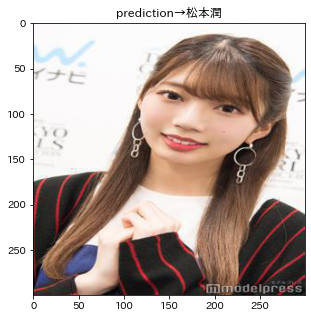

<Figure size 432x288 with 0 Axes>

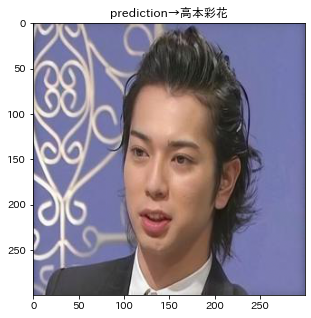

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

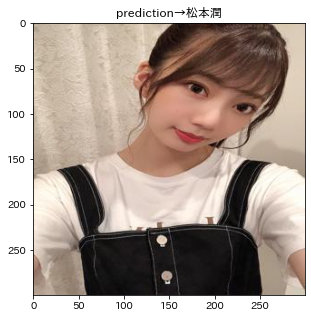

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

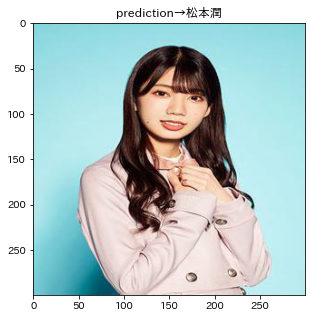

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

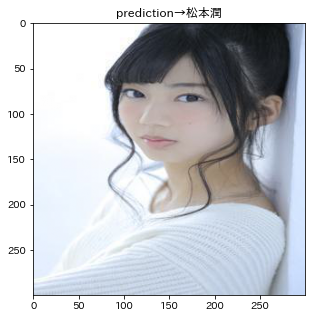

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

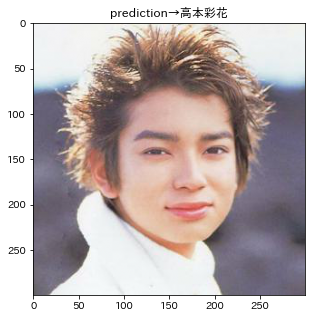

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

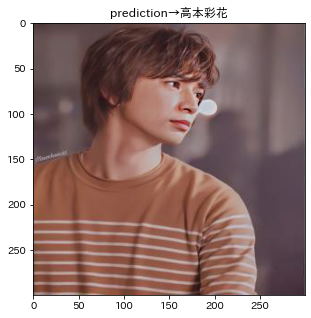

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

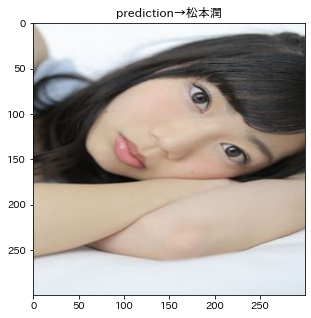

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

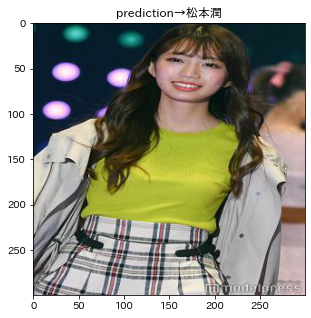

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

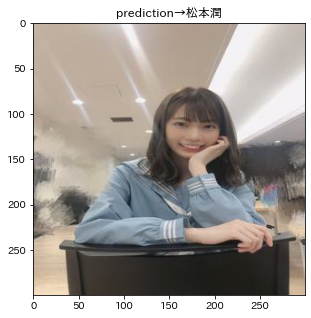

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

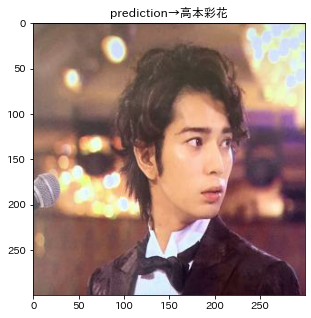

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

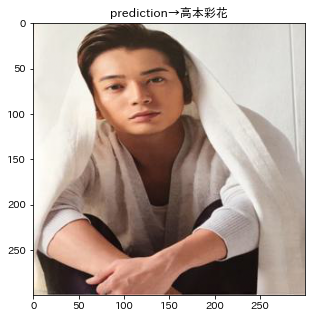

<Figure size 432x288 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [97]:
def show_result_wrong(X, y, predict):
    for i in range(len(X)):
        plt.figure(figsize=(8,5))

        if predict[i]==0:
            result='高本彩花'
        else:
            result='松本潤'
        
        if y.iloc[i]!=predict[i]:
            img = val_X[i]
            img_list = np.asarray(img)
            plt.imshow(img_list)
            plt.title('prediction→'+result)
            plt.show()
            plt.tight_layout()

        
predict2 = model.predict(val_X).argmax(axis=1)
print('prediction: ',predict2[0])
print('label: ', val_y.iloc[0])
show_result_wrong(X=val_X, y=val_y, predict=predict2)

## CNN Implementation for PyTorch

`PyTorch`を用いてニューラルネットワークの計算を行う前に、大まかなコーディングの流れを確認しておきましょう。

1. `torch.tensor`型によるデータの準備
2. data loaderの作成
3. アーキテクチャのコーディング
4. 学習アルゴリズムの設定
5. モデルの予測と評価

In [17]:
from torch.utils.data import DataLoader, TensorDataset
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [23]:
#目的変数と説明変数に分割
from sklearn.model_selection import train_test_split

X=df.drop(['cluster'],axis=1).values
y=df['cluster'].values

test=test_df.values/255.0

#訓練データと検証データに分割
train_X, val_X, train_y, val_y=train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
#テンソル型に変換
train_X1=torch.from_numpy(train_X).float()
val_X1=torch.from_numpy(val_X).float()
train_y1=torch.from_numpy(train_y).long()
val_y1=torch.from_numpy(val_y).long()

In [30]:
#モデルを学習するためのデータセットを用意する
train_datasets=TensorDataset(train_X1, train_y1)
train_loader=DataLoader(train_datasets, batch_size=int(train_X1.shape[0]/5), shuffle=True)

In [ ]:
# アーキテクチャのコーディング
class MultiLayerPerceptron(nn.Module):
    def __init__(self):
        super(MultiLayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(13, 5)
        self.fc2 = nn.Linear(5, 2)
            
    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)
    
model = MultiLayerPerceptron()